# 설정

In [14]:
# 파이썬 ≥ 3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥ 0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Logistic Regression"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 로지스틱 회귀를 사용한 클래스 확률 모델링

<b>로지스틱 회귀</b><sup>logistic regression</sup>(또는 <b>로짓 회귀</b><sup>logit regression</sup>)는 샘플이 특정 클래스에 속할 확률을 추정하는 데 널리 사용된다(예를 들면 이 이메일이 스팸일 확률은 얼마인가?). 추정 확률이 50%가 넘으면 모델은 그 샘플이 해당 클래스에 속한다고 예측한다(즉, 레이블이 '1'인 <b>양성 클래스</b><sup>positive class</sup>). 아니면 클래스에 속하지 않는다고 예측한다(즉, 레이블이 '0'인 <b>음성 클래스</b><sup>negative class</sup>). 이를 이진 분류기라고 한다.

로지스틱 회귀와 퍼셉트론의 차이로는 활성화 함수가 <b>시그모이드 함수</b><sup>sigmoid function</sup>(혹은 <b>로지스틱 시그모이드 함수</b><sup>logistic sigmoid function</sup>)라는 점, 손실 함수가 <b>교차 엔트로피 오차 함수</b><sup>cross-entropy error function</sup>인 점, <b>규제항</b><sup>regularization term</sup>이 추가되어서 과적합을 방지할 수 있다는 점, 온라인 학습과 배치 학습에 모두 적용할 수 있다는 점 등을 볼 수 있다.

## 로지스틱 회귀의 이해와 조건부 확률

로지스틱 회귀는 구현하기 매우 쉽고 선형적으로 구분되는 클래스에 뛰어난 성능을 내는 분류 모델이다. 산업계에서 가장 널리 사용되는 분류 알고리즘 중 하나다. 퍼셉트론이나 아달린과 마찬가지로 로지스틱 회귀 모델도 이진 분류를 위한 선형 모델이지만 다중 분류로 확장할 수 있다. 예를 들어 OvR 방식을 사용한다.

확률 모델로서 로지스틱 회귀 모델 이면에 있는 아이디어를 설명하기 위해 먼저 <b>오즈비</b><sup>odds ratio</sup>를 소개한다. 오즈(승산이라고도 한다)는 특정 이벤트가 발생할 확률이다. 오즈비는 성공 확률이 실패 확률에 비해 몇 배 더 높은가를 나타낸다. 여기서 <i>P</i>는 양성 샘플일 확률이다. 양성 샘플은 좋은 것을 의미하지 않고 예측하려는 대상을 말한다. 예를 들어 환자가 어떤 질병을 가지고 있을 확률이다. 양성 샘플이 클래스 레이블 y=1인 샘플이다.

<div style="text-align:center;">
    <img src="./images/formula/Logistic Regression/odds ratio.png">
</div>

오즈비를 그래프로 그리면 다음과 같다. <i>P</i>가 0부터 1까지 증가할 때 오즈비의 값은 처음에는 천천히 증가하지만 <i>P</i>가 1에 가까워지면 급격히 증가한다.

<b>그림 1</b> 오즈비 그래프
<div style="text-align:center;">
    <img src="./images/Logistic Regression/오즈비 그래프.png">
</div>

오즈비에 로그 함수를 취해 로짓<sup>logit</sup> 함수를 정의한다. 여기서 <i>log</i>는 컴퓨터 과학에서 널리 사용되는 자연 로그다. <i>logit</i> 함수는 [0, 1] 범위의 입력(확률이므로)을 받아 (－∞, ＋∞)의 범위 값으로 변환한다. 

<div style="text-align:center;">
    <img src="./images/formula/Logistic Regression/logit 함수.png">
</div>

로짓 함수는 <i>P</i>가 0.5일 때 0이 되고 <i>P</i>가 0과 1일 때 각각 무한대로 음수와 양수가 되는 특징을 갖는다. 다음은 로짓 함수의 그래프다.

<b>그림 2</b> 로짓 함수 그래프
<div style="text-align:center;">
    <img src="./images/Logistic Regression/로짓함수 그래프.png">
</div>

특성의 가중치 합과 로그 오즈 사이의 선형 관계를 다음과 같이 쓸 수 있다.

<div style="text-align:center;">
    <img src="./images/formula/Logistic Regression/가중합과 로그 오즈 사이의 관계.png">
</div>

여기서 <i>p</i>(<i>y</i>=1|<b>x</b>)는 특성 <b>x</b>가 주어졌을 때 이 샘플이 클래스 1에 속할 조건부 확률이다.

어떤 샘플이 특정 클래스에 속할 <b>확률</b>을 예측하는 것이 관심 대상이므로 <i>logit</i> 함수를 거꾸로 뒤집는다. 이 함수를 로지스틱 시그모이드 함수라고 한다. 함수 모양이 S자 형태를 띠기 때문에 간단하게 줄여서 시그모이드 함수라고도 한다.

<div style="text-align:center;">
    <img src="./images/formula/Logistic Regression/sigmoid.png">
</div>

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: #D0B134"><strong>NOTEΞ</strong></span> 로짓과 로지스틱 함수는 서로 역함수 관계이다. 그래서 로지스틱 함수의 입력을 로짓이라고 부른다.<br><br>
    <div style="text-align:center;">
        <img src="./images/formula/Logistic Regression/유도과정.png">
    </div><br>
    로짓을 <b>로그 오즈</b><sup>log-odds</sup>라고도 부른다. 로그 오즈는 양성 클래스 추정 확률과 음성 클래스 추정 확률 사이의 로그 비율이기 때문이다.
</div>

여기서 z는 가중치와 샘플 특성의 선형 조합으로 이루어진 최종 입력이다. 즉, z = <b>w</b><sup>T</sup><b>x</b> = <i>w</i><sub>0</sub><i>x</i><sub>0</sub> + <i>w</i><sub>1</sub><i>x</i><sub>1</sub> + ... + <i>w</i><sub>m</sub><i>x</i><sub>m</sub> 이다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: #D0B134"><strong>NOTEΞ</strong></span> Perceptron에서 사용했던 방식처럼 <i>w</i><sub>0</sub>은 절편을 의미한다. 이를 위해 값이 1인 입력 <i>x</i><sub>0</sub>를 추가한다.
</div>

## 시그모이드 함수

시그모이드는 다음과 같은 S자 형태의 함수이다. 계단 함수와 같이 함숫값의 범위도 [0, 1] 사이이다. 시그모이드 함수는 모든 구간에서 미분할 수 있고 증가 함수이므로 미분값이 항상 양수이다.

시그모이드 함수<sup><a id="a01" href="#p01">1</a></sup>가 어떤 모습인지 -7에서 7까지 그려 보겠다.

NameError: name 'save_fig' is not defined

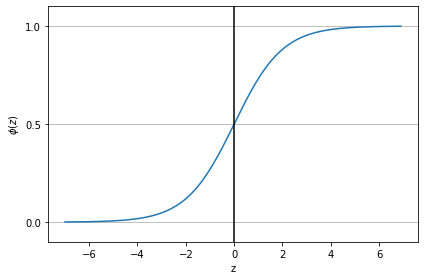

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
# y축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
save_fig('시그모이드 곡선')
plt.show()

z가 무한대로 가면(z→∞) <i>e<sup>-z</sup></i>가 매우 작아지기 때문에 <i>Φ(z)</i>는 1에 가까워진다. 비슷하게 z→－∞이면 점점 분모가 커지기 때문에 <i>Φ(z)</i>는 0에 수렴한다. 이 시그모이드 함수는 실수 입력 값을 [0, 1] 사이의 값으로 변환한다. 중간은 <i>Φ(0)</i> = 0.5다.

시그모이드는 오랫동안 활성 함수로 사용되었지만 다음과 같은 몇 가지 문제점이 있다.
<ul>
    <li>함수 정의에 지수 함수가 포함되어 있어서 연산 비용이 많이 든다.</li>
    <li>그레디언트 포화가 발생해서 학습이 중단될 수 있다.</li>
    <li>양수만 출력하므로 학습 경로가 진동하면서 학습 속도가 느려진다.</li>
</ul>

<b>그레디언트 포화</b><sup>gradient saturation</sup>란 시그모이드 함수 끝부분에서 미분값이 0으로 포화되는 상태를 말한다. 함수에서 <b>포화</b><sup>saturation</sup>란 입력값이 변화해도 함수값이 변화하지 않는 상태를 말한다. 다음 그림에서 시그모이드 함수는 주황색 곡선으로 그려저 있고 도함수는 파란색 곡선으로 그려져 있다. 시그모이드 함수는 양쪽 끝에서 함수값이 0과 1로 포화하기 때문에 <b>미분값</b>도 0으로 포화한다. 그레디언트가 0으로 포화하면 그레디언트 소실로 학습이 진행되지 않는다.

<div style="text-align:center;">
    <img src="./images/Logistic Regression/시그모이드 함수의 그레디언트 포화.png">
</div>

한편 시그모이드의 출력은 항상 양수이기 때문에 학습 시 최적화 경로가 최적해를 향해 곧바로 가지 못하고 좌우로 진동하면서 비효율적으로 가게 된다.

### 시그모이드 함수와 계단 함수 비교

시그모이드 함수와 Perceptron의 활성화 함수인 계단 함수를 비교해보자. 이 두 함수를 [그림 3]에 함께 그려봤다.

<b>그림 3</b> 계단 함수(점선)와 시그모이드 함수(실선)
<div style="text-align:center;">
    <img src="./images/Logistic Regression/계단 함수와 시그모이드 함수.png">
</div>

[그림 3]을 보고 가장 먼저 느껴지는 점은 '매끄러움'의 차이일 것이다. 시그모이드 함수는 부드러운 곡선이며 입력에 따라 출력이 연속적으로 변화한다. 한편, 계단 함수는 0을 경계로 출력이 갑자기 바뀌어버린다. 시그모이드 함수의 이 매끈함이 신경망 학습에서 아주 중요한 역할을 하게 된다(미분이 가능하기 때문에).

계단 함수가 0과 1 중 하나의 값만 돌려주는 반면 시그모이드 함수는 실수를 돌려준다는 점도 다르다. 다시 말해 퍼셉트론에서는 뉴런 사이에 0 혹은 1이 흘렀다면, 신경망에서는 연속적인 실수가 흐른다.

두 함수는 매끄러움이라는 점에서는 다르지만, [그림 3]을 큰 관점에서 보면 둘은 같은 모양을 하고 있다. 둘 다 입력이 작을 때의 출력은 0에 가깝고(혹은 0이고), 입력이 커지면 출력이 1에 가까워지는(혹은 1이 되는) 구조인 것이다. 즉, 계단 함수와 시그모이드 함수는 입력이 중요하면 큰 값을 출력하고 입력이 중요하지 않으면 작은 값을 출력한다. 그리고 입력이 아무리 작거나 커도 출력은 0에서 1 사이라는 것도 둘의 공통점이다.

### 비선형 함수

계단 함수와 시그모이드 함수의 공통점은 그 밖에도 있다. 중요한 공통점으로, 둘 모두 <b>비선형 함수</b>다. 시그모이드 함수는 곡선, 계단 함수는 계단처럼 구부러진 직선으로 나타나며, 동시에 비선형 함수로 분류된다.

<div style="background-color:#D3D3D3; padding:10px;">
    <span style="color: #D0B134"><strong>NOTEΞ</strong></span> 활성화 함수를 설명할 때 비선형 함수와 선형 함수라는 용어가 자주 등장한다. 함수란 어떤 값을 입력하면 그에 따른 값을 돌려주는 '변환기'다. 이 변환기에 무언가 입력했을 때 출력이 입력의 상수배만큼 변하는 함수를 <b>선형 함수</b>라고 한다. 수식으로는 <i>f(x) = ax + b</i>이고, 이때 <i>a</i>와 <i>b</i>는 상수다. 그래서 선형 함수는 곧은 1개의 직선이 된다. 한편, <b>비선형 함수</b>는 문자 그대로 '선형이 아닌' 함수다. 즉, 직선 1개로는 그릴 수 없는 함수를 말한다.
</div>

신경망에서는 활성화 함수로 비선형 함수를 사용해야 한다. 달리 말하면 선형 함수를 사용해서는 안 된다. 그 이유는 바로 선형 함수를 이용하면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다.

선형 함수의 문제는 층을 아무리 깊게 해도 '은닉층이 없는 네트워크'로도 똑같은 기능을 할 수 있다는 데 있다. 구체적으로 (약간 직감적으로) 설명해주는 간단한 예를 생각해보자. 선형 함수인 <i>h(x) = cx</i>를 활성화 함수로 사용한 3층 네트워크를 떠올려보자. 이를 식으로 나타내면 <i>y(x) = h(h(h(x)))</i>가 된다. 이 계산은 <i>y(x) = c * c * c * x</i>처럼 곱셈을 세 번 수행하지만, 실은 <i>y(x) = ax</i>와 똑같은 식이다. <i>a = c<sup>3</sup></i>이라고만 하면 끝이다. 즉, 은닉층이 없는 네트워크로도 표현할 수 있다. 이 예처럼 선형 함수를 이용해서는 여러 층으로 구성하는 이점을 살릴 수 없다. 그래서 층을 쌓는 혜택을 얻고 싶다면 활성화 함수로는 반드시 비선형 함수를 사용해야 한다.

## 아달린과 로지스틱 회귀의 차이점

로지스틱 회귀 모델을 직관적으로 이해하기 위해 아달린과 연관 지어 생각해보자. 아달린에서는 활성화 함수로 항등 함수 <i>Φ(z) = z</i>를 사용했다. 로지스틱 회귀에서는 앞서 정의한 시그모이드 함수가 활성화 함수가 된다. 아달린과 로지스틱 회귀의 차이점을 [그림 4]에 나타냈다.

<b>그림 4</b> 아달린과 로지스틱 회귀의 차이점
<div style="text-align:center;">
    <img src="./images/Logistic Regression/아달린과 로지스틱 회귀의 차이점.jpg">
</div>

가중치 <b>w</b>와 곱해지는 특성 <b>x</b>에 대한 시그모이드 함수의 출력을 특정 샘플이 클래스 1에 속할 확률 <i>Φ(z) = P(y=1</i> |<b>x;w</b>)로 해석한다. 예를 들어 어떤 붓꽃 샘플이 <i>Φ(z)</i> = 0.8이라면 이 샘플은 Iris-versicolor일 확률이 80%란 뜻이다. 이 샘플이 Iris-setosa일 확률은 <i>P(y=0</i> |<b>x;w</b>) = 1 - P(y=1</i> |<b>x;w</b>) = 0.2처럼 계산되어 20%가 된다. 예측 확률은 임계 함수를 사용하여 간단하게 이진 출력으로 바꿀 수 있다.

<div style="text-align:center;">
    <img src="./images/formula/Logistic Regression/로지스틱 회귀 임계 함수.png">
</div>

앞의 시그모이드 함수 그래프를 보면 다음과 동일하다는 것을 알 수 있다.

<div style="text-align:center;">
    <img src="./images/formula/Logistic Regression/로지스틱 회귀 임계 함수2.png">
</div>

실제로 클래스 레이블을 예측하는 것 외에 클래스에 소속될 확률(임계 함수를 적용하기 전 시그모이드 함수 출력)을 추정하는 것이 유용한 애플리케이션도 많다. 예를 들어 어떤 날에 비가 오는지 예측하는 것뿐만 아니라 비 올 확률을 예측해야 하는 날씨 예보에 로지스틱 회귀를 사용할 수 있다. 비슷하게 어떤 증상이 있는 환자가 특정 질병을 가질 확률을 예측하는 데 로지스틱 회귀를 사용할 수 있다. 이것이 로지스틱 회귀가 의학 분야에 널리 사용되는 이유다.

## 로지스틱 회귀 중간 정리하기

로지스틱 회귀는 이진 분류가 목표이므로 －∞부터 ＋∞의 범위를 갖는 <i>z</i>(가중합)의 값을 조절할 방법이 필요했다. 그래서 시그모이드 함수를 활성화 함수로 사용한 것이다. 이는 시그모이드 함수를 통과하면 <i>z</i>를 확률처럼 해석할 수 있기 때문이다. 그리고 시그모이드 함수의 확률인 <i>Φ(z)</i>를 0과 1로 구분하기 위하여 마지막에 임계 함수를 사용했다. 그 결과 입력 데이터(<i>x</i>)는 0 또는 1의 값으로 나누어졌다. 즉, 이진 분류가 되었다.

드디어 로지스틱 회귀가 '이진 분류를 하기 위한 알고리즘'인 진짜 이유를 알았다. 그런데 아직 우리는 가중치와 절편을 적절하게 업데이트할 수 있는 방법을 배우지 않았다. 그렇다면 로지스틱 회귀에는 어떤 손실 함수를 사용해야 할까? 아달린에서 손실 함수로 제곱 오차합을 사용했듯이 분류 문제에서도 제곱 오차합을 사용할 수 있을까? 이제 로지스틱 회귀를 위한 손실 함수인 로지스틱 손실 함수에 대해 알아보자.

## 로지스틱 비용 함수의 가중치 학습

로지스틱 회귀 모델이 확률과 클레스 레이블을 어떻게 예측했는지 배웠다. 이제 모델 파라미터 <b>w</b>를 어떻게 학습하는지 간단하게 살펴보겠다. 이전 장에서 다음과 같은 제곱 오차합 비용 함수를 정의했다.

<div style="text-align:center;">
    <img src="./images/formula/Logistic Regression/Adaline_cost_func.png">
</div>

아달린 분류 모델에서 이 함수를 최소화하는 가중치 <i>w</i>를 학습한다. 로지스틱 회귀의 비용 함수를 유도하는 방법을 설명하기 위해 먼저 로지스틱 회귀 모델을 만들 때 최대화하려는 가능도<sup>likelihood</sup> <i>L</i>을 정의하겠다. 데이터셋에 있는 각 샘플이 서로 독립적이라고 가정한다. 공식은 다음과 같다.<sup><a id="a02" href="#p02">2</a></sup>

<div style="text-align:center;">
    <img src="./images/formula/Logistic Regression/가능도.png">
</div>

실전에서는 이 공식의 (자연) 로그를 최대화하는 것이 더 쉽다. 이 함수를 로그 가능도 함수라고 한다.

<div style="text-align:center;">
    <img src="./images/formula/Logistic Regression/로그 가능도 함수.png">
</div>

첫째, 로그 함수를 적용하면 가능도가 매우 작을 때 일어나는 수치상의 언더플로<sup>underflow</sup>를 미연에 방지한다. 둘째, 계수의 곱을 계수의 합으로 바꿀 수 있다. 이렇게 하면 도함수를 구하기 쉽다.

경사 상승법 같은 최적화 알고리즘을 사용하여 이 로그 가능도 함수를 최대화할 수 있다. 또는 로그 가능도 함수를 다시 비용 함수 <i>J</i>로 표현하여 아달린에서처럼 경사 하강법을 사용하여 최소화할 수 있다.

<div style="text-align:center;">
    <img src='./images/formula/Logistic Regression/비용함수 J.png'>
</div>

이 비용 함수를 더 잘 이해하기 위해 샘플이 하나일 때 비용을 계산해 보자.

<div style="text-align:center;">
    <img src='./images/formula/Logistic Regression/비용함수 예시.png'>
</div>

식을 보면 y=0일 때 첫 번째 항이 0이 된다. y=1일 때는 두 번째 항이 0이 된다.

<div style="text-align:center;">
    <img src='./images/formula/Logistic Regression/비용함수 예시 2.png'>
</div>

간단한 코드로 샘플이 하나인 경우 <i>Φ(z)</i> 값에 대한 분류 비용을 그려 보겠다.

그림 저장: 시그모이드 활성화 대비 로지스틱 비용 그래프


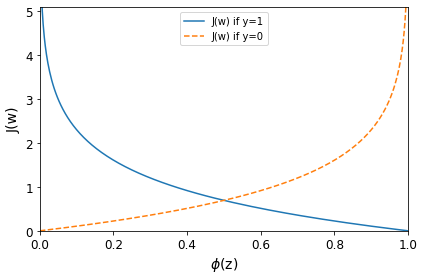

In [15]:
def cost_1(z):
    return -np.log(sigmoid(z))
def cost_0(z):
    return -np.log(1 - sigmoid(z))
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
save_fig('시그모이드 활성화 대비 로지스틱 비용 그래프')
plt.show()

결과 그래프의 x축은 0에서 1까지 범위의 시그모이드 활성화 값이다(시그모이드 함수의 입력인 <i>z</i>는 -10에서 10까지 범위다). y축은 해당하는 로지스틱 비용이다.

클래스 1에 속한 샘플을 정확히 예측하면 비용이 0에 가까워지는 것을 볼 수 있다(실선). 비슷하게 클래스 0에 속한 샘플을 y=0으로 정확히 예측하면 y축의 비용이 0에 가까워진다(점선). 예측이 잘못되면 비용이 무한대가 된다. 잘못된 예측에 점점 더 큰 비용을 부여한다는 점이 중요하다.

# 미주

<b id="p01">1</b> 시그모이드<sup>sigmoid</sup>란 'S자 모양'이라는 뜻이다. 계단 함수처럼 그 모양을 따 이름을 지은 것이다. [↩](#a01)

<b id="p02">2</b> Π 기호는 수열의 곱을 나타낸다. 여기서는 n개의 샘플이 해당 클래스에 속할 확률을 곱한 것이다. 양성 샘플일 경우 1-<i>y<sup>(i)</sup></i>가 0이 되어 두 번째 항이 1이 되고 양성 샘플일 확률 <i>Φ(z<sup>(i)</sup>)</i>만 남는다. 반대로 음성 샘플일 경우 <i>y<sup>(i)</sup></i>가 0이 되어 첫 번째 항이 1이 되고 음성 샘플일 확률 1 - <i>Φ(z<sup>(i)</sup>)</i>만 남는다. 따라서 가능도가 최대가 되려면 양성 샘플의 <i>Φ(z<sup>(i)</sup>)</i>는 가능한 크고 음성 샘플의 <i>Φ(z<sup>(i)</sup>)</i>는 가능한 작아야 한다. [↩](#a02)